In [354]:
import pyodbc
import time
import pandas as pd

server = 'codiecon.database.windows.net'
database = 'codeicon'
username = 'satish@codiecon'
password = 'Nitssats123'
driver= '/usr/local/lib/libmsodbcsql.17.dylib'
cnxn = pyodbc.connect('DRIVER='+driver+';SERVER='+server+';PORT=1433;DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()
cursor.execute("select email,age_grp,gender,indoor, outdoor, game_type, game_time from dbo.tournament_booked right outer join dbo.users on dbo.tournament_booked.user1_email = dbo.users.email;")
row = cursor.fetchone()

with open('data.csv', 'w') as the_file:
    the_file.write('userId#age_grp#gender#indoor#outdoor#game_type#game_time\n')
    while row:
        the_file.write(str(row[0]) + "#" + str(row[1]) + "#" + str(row[2]) + "#" + str(row[3]) + "#" + str(row[4]) + "#" + str(row[5]) +  "#" + str(row[6]) + "\n")
        row = cursor.fetchone()

In [355]:
data = pd.read_csv("data.csv", sep='#',header='infer')
data.head(100)

,userId,age_grp,gender,indoor,outdoor,game_type,game_time
0,sumi1tkhaitan@gmail.com,25-30,f,"table tennis,chess","badminton,cricket",chess1,1552156350000
1,sumi1tkhaitan@gmail.com,25-30,M,"table tennis,chess","badminton,cricket",chess1,1552155508000
2,one@gmail.com,25-30,M,"table tennis,chess","badminton,cricket",cricket,1552162612000
3,shivamfromdelhi@gmail.com,25-30,M,"table tennis,chess","badminton,cricket",None,None
4,shivamfromdelhi1234@gmail.com,25-30,M,"table tennis,chess","badminton,cricket",None,None
5,NaN,25-30,M,badminton,basketball,None,None
6,shivamfromdelhi12314@gmail.com,25-30,M,badminton,cricket,None,None
7,shivamfromdelhi1231qwwq4@gmail.com,25-30,M,badminton,cricket,None,None
8,aaa@a.com,25-30,M,chess,cricket,None,None
9,aaa@aaa.ccc,21-25,m,"badminton,chess",football,None,None


In [356]:
data['gender'] = data['gender'].map({'M': 0, 'F': 1, 'm': 0 , 'f': 1})
data['age_grp'] = data['age_grp'].map({'1-5': 0, '5-10': 1, '11-15': 2 , '15-20': 3,'21-25': 4, '25-30': 5, '31-35': 6 , '35-40': 7,'41-45': 8, '45-50': 9, '51-55': 10 , '55-60': 11})

In [357]:
data.head(100)

,userId,age_grp,gender,indoor,outdoor,game_type,game_time
0,sumi1tkhaitan@gmail.com,5,1,"table tennis,chess","badminton,cricket",chess1,1552156350000
1,sumi1tkhaitan@gmail.com,5,0,"table tennis,chess","badminton,cricket",chess1,1552155508000
2,one@gmail.com,5,0,"table tennis,chess","badminton,cricket",cricket,1552162612000
3,shivamfromdelhi@gmail.com,5,0,"table tennis,chess","badminton,cricket",None,None
4,shivamfromdelhi1234@gmail.com,5,0,"table tennis,chess","badminton,cricket",None,None
5,NaN,5,0,badminton,basketball,None,None
6,shivamfromdelhi12314@gmail.com,5,0,badminton,cricket,None,None
7,shivamfromdelhi1231qwwq4@gmail.com,5,0,badminton,cricket,None,None
8,aaa@a.com,5,0,chess,cricket,None,None
9,aaa@aaa.ccc,4,0,"badminton,chess",football,None,None


In [358]:
games = ['table tennis','chess','badminton','cricket']
current_time = lambda: int(round(time.time() * 1000))
#last 10 days moving window
t = 864000000

def flaten(indoor, outdoor, game_type, game_time,type_of_game):
    game = []
    for i in indoor.split(","):
        game.append(i.lower())
    for i in outdoor.split(","):
        game.append(i.lower())
        
    if(game_type != 'None' and game_time != 'None' and game_time != 'game_time' and (int(current_time())-int(game_time)) < t):
        game.append(game_type.lower())
    return game.count(type_of_game)

for g in games:
    data[g] = data.apply(lambda x: flaten(x['indoor'],x['outdoor'],x['game_type'],x['game_time'],g), axis=1)
    
data = data.drop(columns=['indoor', 'outdoor','game_type','game_time'])

In [359]:
data = data.dropna(how='any')
data.head(100)

,userId,age_grp,gender,table tennis,chess,badminton,cricket
0,sumi1tkhaitan@gmail.com,5,1,1,1,1,1
1,sumi1tkhaitan@gmail.com,5,0,1,1,1,1
2,one@gmail.com,5,0,1,1,1,2
3,shivamfromdelhi@gmail.com,5,0,1,1,1,1
4,shivamfromdelhi1234@gmail.com,5,0,1,1,1,1
6,shivamfromdelhi12314@gmail.com,5,0,0,0,1,1
7,shivamfromdelhi1231qwwq4@gmail.com,5,0,0,0,1,1
8,aaa@a.com,5,0,0,1,0,1
9,aaa@aaa.ccc,4,0,0,1,1,0
10,test@test.com,3,0,0,1,0,0


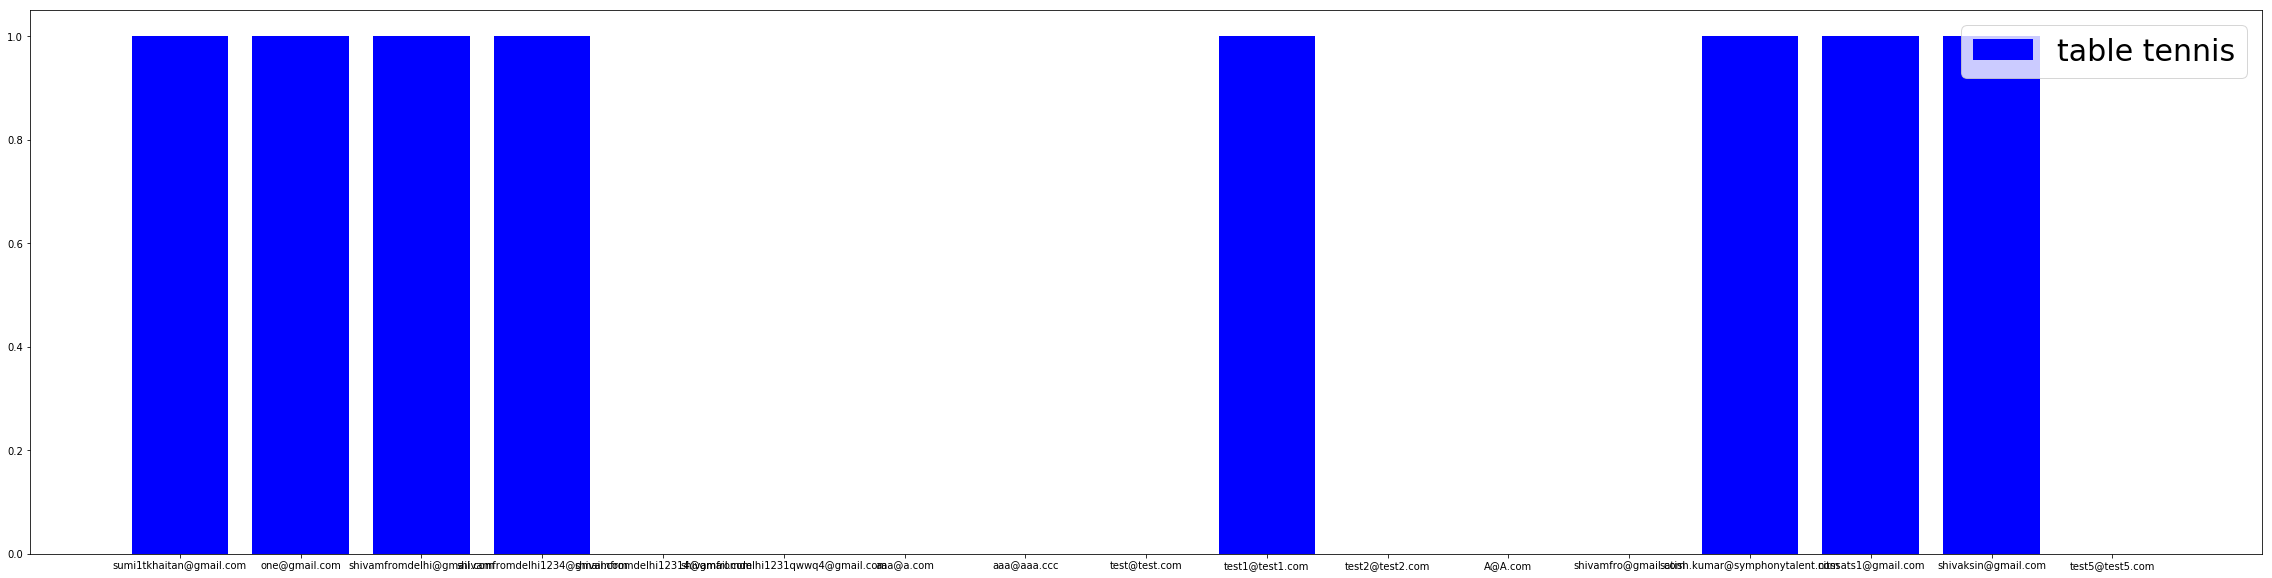

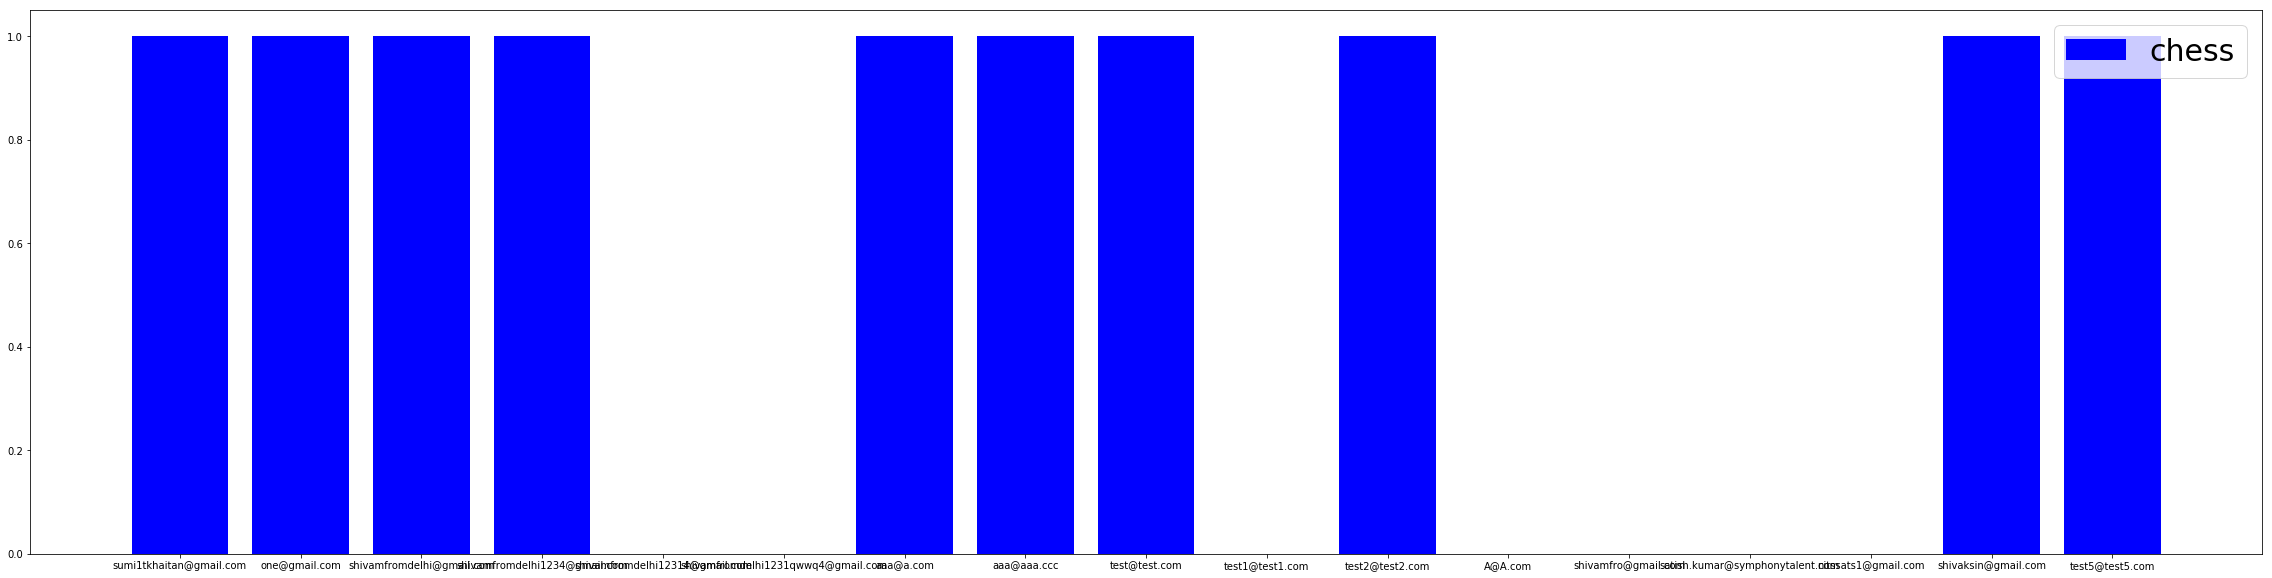

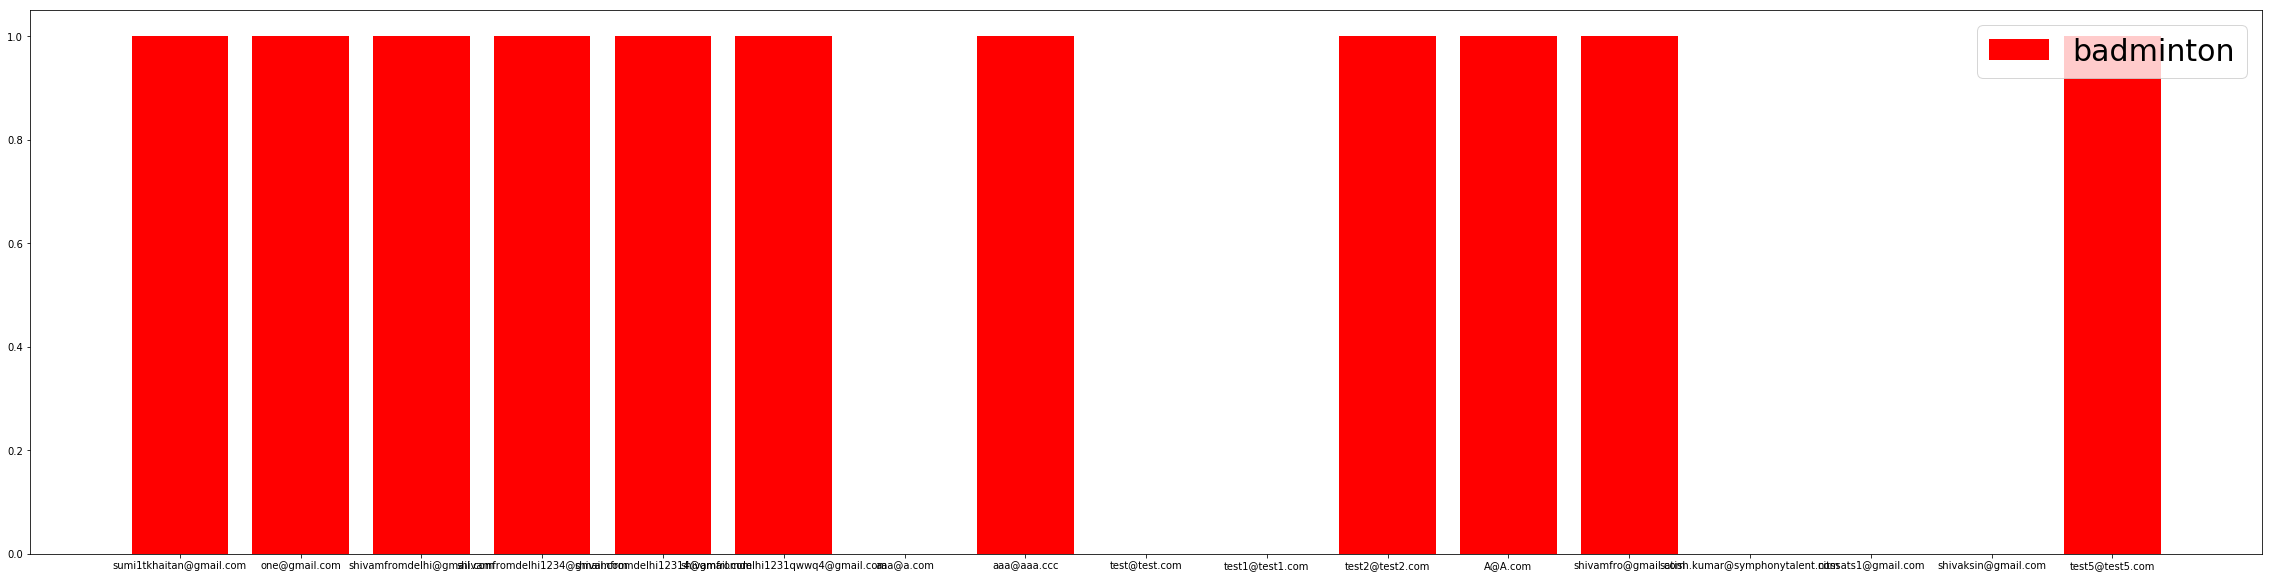

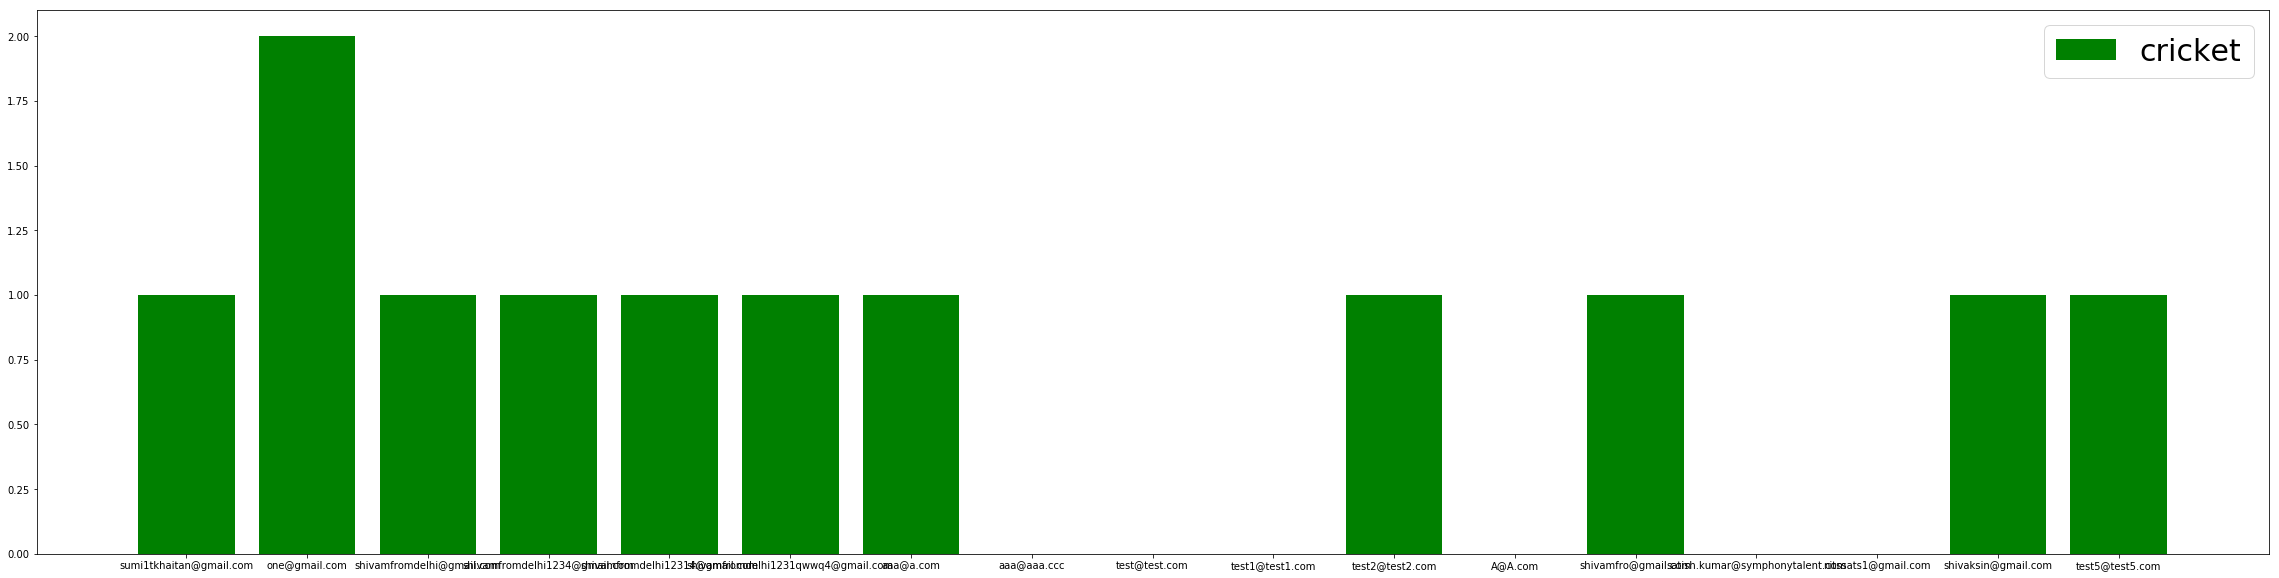

In [360]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import random
co = ['r','g','b','r','g','b']
for g in games:
    plt.figure(figsize=(40,10))
    plt.bar(data['userId'],data[g],color=co[random.randint(0,5)],label = g)
    plt.legend(loc=1, prop={'size': 30})
    plt.show()
    


In [361]:
from sklearn.cluster import KMeans
users = list(data['userId'])
data = data.drop(columns=['userId'])
kmeans = KMeans(n_clusters=5, random_state=0).fit(data)

In [362]:
kmeans.labels_

array([2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 4, 0, 0, 3, 3, 4, 4], dtype=int32)

In [363]:
print(users)

['sumi1tkhaitan@gmail.com', 'sumi1tkhaitan@gmail.com', 'one@gmail.com', 'shivamfromdelhi@gmail.com', 'shivamfromdelhi1234@gmail.com', 'shivamfromdelhi12314@gmail.com', 'shivamfromdelhi1231qwwq4@gmail.com', 'aaa@a.com', 'aaa@aaa.ccc', 'test@test.com', 'test1@test1.com', 'test2@test2.com', 'A@A.com', 'shivamfro@gmail.com', 'satish.kumar@symphonytalent.com', 'nitssats1@gmail.com', 'shivaksin@gmail.com', 'test5@test5.com']


In [364]:
cluster = {}
for i in range(0,len(users)):
    if(kmeans.labels_[i] in cluster):
        user = cluster[kmeans.labels_[i]]
        user.append(users[i])
        cluster[kmeans.labels_[i]] = user
    else:
        user = []
        user.append(users[i])
        cluster[kmeans.labels_[i]] = user

for key, value in cluster.items():
    print(str(value)+"\n")
        
    

['sumi1tkhaitan@gmail.com', 'sumi1tkhaitan@gmail.com', 'one@gmail.com', 'shivamfromdelhi@gmail.com', 'shivamfromdelhi1234@gmail.com']

['shivamfromdelhi12314@gmail.com', 'shivamfromdelhi1231qwwq4@gmail.com', 'aaa@a.com', 'A@A.com', 'shivamfro@gmail.com']

['aaa@aaa.ccc', 'test@test.com', 'test1@test1.com']

['test2@test2.com', 'shivaksin@gmail.com', 'test5@test5.com']

['satish.kumar@symphonytalent.com', 'nitssats1@gmail.com']



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d9327b8>,
      dtype=object)

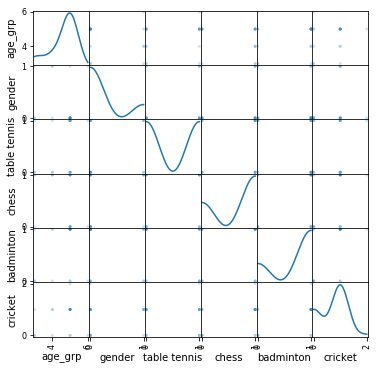

In [365]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data, alpha=0.2, figsize=(6, 6), diagonal='kde')